### Actividad AG_1.2

Ivanna Maldonado Cervantes 

Paula Simonetta Madrid Pérez

Ania Diaz Gonzalez 

Miranda Eugenia Colorado Arróniz


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('projectos_forvia.csv')

In [3]:
df = df.drop(df.index[245]).reset_index(drop=True)

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                245 non-null    object 
 1   Active                245 non-null    object 
 2   Project Name          245 non-null    object 
 3   Project Type          245 non-null    object 
 4   Geographical scope    245 non-null    object 
 5   Project manager       245 non-null    object 
 6   State                 245 non-null    object 
 7   Percent complete      245 non-null    float64
 8   Project size          245 non-null    object 
 9   Project organization  245 non-null    object 
 10  Planned Go Live date  245 non-null    object 
 11  Project target phase  72 non-null     object 
 12  Actual Go Live date   48 non-null     object 
 13  Actual end date       0 non-null      float64
 14  BG                    245 non-null    object 
 15  Closed                1

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    173
Actual Go Live date     197
Actual end date         245
BG                        0
Closed                  244
Domain                    0
Domain Path               0
Last WAR                 13
Project Health           13
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date        18
On-hold                   0
dtype: int64

In [5]:
df["Percent complete"] = df["Percent complete"].astype(str).str.replace("%", "", regex=False)
df["Percent complete"] = pd.to_numeric(df["Percent complete"], errors="coerce")

In [6]:
df = df.drop(columns=["Actual end date", "Closed", "Domain Path", "Actual Go Live date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                245 non-null    object 
 1   Active                245 non-null    object 
 2   Project Name          245 non-null    object 
 3   Project Type          245 non-null    object 
 4   Geographical scope    245 non-null    object 
 5   Project manager       245 non-null    object 
 6   State                 245 non-null    object 
 7   Percent complete      245 non-null    float64
 8   Project size          245 non-null    object 
 9   Project organization  245 non-null    object 
 10  Planned Go Live date  245 non-null    object 
 11  Project target phase  72 non-null     object 
 12  BG                    245 non-null    object 
 13  Domain                245 non-null    object 
 14  Last WAR              232 non-null    object 
 15  Project Health        2

#### **Procesamos outliers y nulos** 

In [7]:
df["Planned start date 2"] = pd.to_datetime(df["Planned start date"], dayfirst=True, errors='coerce')

In [8]:
sum = int(df["Planned start date 2"].isnull().sum())
sum

133

In [9]:
df["Planned start date 3"] = df["Planned start date"].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')

In [10]:
sum = int(df["Planned start date 3"].isnull().sum())
sum

0

In [11]:
df[df["Planned start date 2"].isnull()][["Planned start date", "Planned start date 2", "Planned start date 3"]]

,Planned start date,Planned start date 2,Planned start date 3
1,18/01/2024 08:00:00,NaT,18/01/2024
7,14/10/2024 08:00:00,NaT,14/10/2024
8,14/02/2025 08:00:00,NaT,14/02/2025
9,19/09/2024 08:00:00,NaT,19/09/2024
10,21/10/2024 14:00:00,NaT,21/10/2024
...,...,...,...
235,28/03/2025 06:00:00,NaT,28/03/2025
238,28/10/2024 08:00:00,NaT,28/10/2024
239,21/01/2025 08:00:00,NaT,21/01/2025
240,25/03/2025 08:00:00,NaT,25/03/2025


In [12]:
df['Planned start date'] = pd.to_datetime(df['Planned start date 3'], format='%d/%m/%Y', dayfirst=True, errors='coerce')

In [13]:
df[df["Planned start date 2"].isnull()][["Planned start date", "Planned start date 2", "Planned start date 3"]]

,Planned start date,Planned start date 2,Planned start date 3
1,2024-01-18,NaT,18/01/2024
7,2024-10-14,NaT,14/10/2024
8,2025-02-14,NaT,14/02/2025
9,2024-09-19,NaT,19/09/2024
10,2024-10-21,NaT,21/10/2024
...,...,...,...
235,2025-03-28,NaT,28/03/2025
238,2024-10-28,NaT,28/10/2024
239,2025-01-21,NaT,21/01/2025
240,2025-03-25,NaT,25/03/2025


In [14]:
df.drop(columns=["Planned start date 2", "Planned start date 3"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Number                245 non-null    object        
 1   Active                245 non-null    object        
 2   Project Name          245 non-null    object        
 3   Project Type          245 non-null    object        
 4   Geographical scope    245 non-null    object        
 5   Project manager       245 non-null    object        
 6   State                 245 non-null    object        
 7   Percent complete      245 non-null    float64       
 8   Project size          245 non-null    object        
 9   Project organization  245 non-null    object        
 10  Planned Go Live date  245 non-null    object        
 11  Project target phase  72 non-null     object        
 12  BG                    245 non-null    object        
 13  Domain              

In [15]:
df.isnull().sum()

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase    173
BG                        0
Domain                    0
Last WAR                 13
Project Health           13
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date        18
On-hold                   0
dtype: int64

### project target phase, last war, project health, actual start day (str)

In [16]:
df["Project target phase"] =df["Project target phase"].fillna("NA") 
df["Last WAR"] =df["Last WAR"].fillna("NA")
df["Actual start date"] =df["Actual start date"].fillna("NA")


In [17]:
df["Project Health"] =df["Project Health"].fillna('Red')

In [18]:
df.isnull().sum()

Number                  0
Active                  0
Project Name            0
Project Type            0
Geographical scope      0
Project manager         0
State                   0
Percent complete        0
Project size            0
Project organization    0
Planned Go Live date    0
Project target phase    0
BG                      0
Domain                  0
Last WAR                0
Project Health          0
Project type            0
Recurrent activity      0
Planned start date      0
Actual start date       0
On-hold                 0
dtype: int64

#### **Project Type**

In [19]:
tabla_freq = df['Project Type'].value_counts().reset_index()
tabla_freq

,Project Type,count
0,Shopfloor JIT/TCO,80
1,FCS roll-outs,75
2,New software or release,46
3,Shopfloor LES/NEO,13
4,Studies / Moves / Solution Selection / Other,8
5,New Site infrastructure,7
6,Overall Project Coordination,6
7,Shopfloor DMC/SPC,5
8,New infrastructure,3
9,ITAC,1


In [20]:
# filtro con los valores más relevantes de la variable 
filtro = tabla_freq[tabla_freq['count']>1]
filtro

,Project Type,count
0,Shopfloor JIT/TCO,80
1,FCS roll-outs,75
2,New software or release,46
3,Shopfloor LES/NEO,13
4,Studies / Moves / Solution Selection / Other,8
5,New Site infrastructure,7
6,Overall Project Coordination,6
7,Shopfloor DMC/SPC,5
8,New infrastructure,3


In [21]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index = filtro.set_index('Project Type')
filtro_index

,count
Project Type,
Shopfloor JIT/TCO,80
FCS roll-outs,75
New software or release,46
Shopfloor LES/NEO,13
Studies / Moves / Solution Selection / Other,8
New Site infrastructure,7
Overall Project Coordination,6
Shopfloor DMC/SPC,5
New infrastructure,3


Text(0, 0.5, 'Frecuencia')

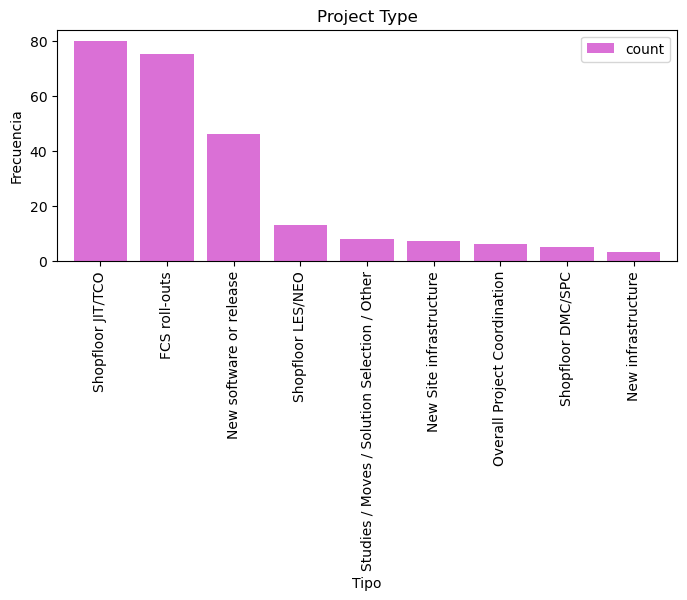

In [22]:
# realizamos gráfico de barras
filtro_index.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project Type')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

#### **Geographical Scope**

In [23]:
tabla_freq1 = df['Geographical scope'].value_counts().reset_index()
tabla_freq1

,Geographical scope,count
0,WORLD WIDE,20
1,BRAZIL,9
2,PUEBLA HQ,7
3,BRAGANCA,6
4,PARIS TECH CENTER,5
...,...,...
121,JAPAN,1
122,JANGAN FHS,1
123,JANGAN,1
124,HERRENBERG,1


In [24]:
# filtro con los valores más relevantes de la variable 
filtro1 = tabla_freq1[tabla_freq1['count']>3]
filtro1

,Geographical scope,count
0,WORLD WIDE,20
1,BRAZIL,9
2,PUEBLA HQ,7
3,BRAGANCA,6
4,PARIS TECH CENTER,5
5,MLADA BOLESLAV FCM Bezdecin,5
6,LIPPSTADT 2 HQH & FES R&D,5
7,GOIANA,4
8,NAO,4
9,MLADA BOLESLAV FIS,4


In [25]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index1 = filtro1.set_index('Geographical scope')
filtro_index1

,count
Geographical scope,
WORLD WIDE,20
BRAZIL,9
PUEBLA HQ,7
BRAGANCA,6
PARIS TECH CENTER,5
MLADA BOLESLAV FCM Bezdecin,5
LIPPSTADT 2 HQH & FES R&D,5
GOIANA,4
NAO,4


Text(0, 0.5, 'Frecuencia')

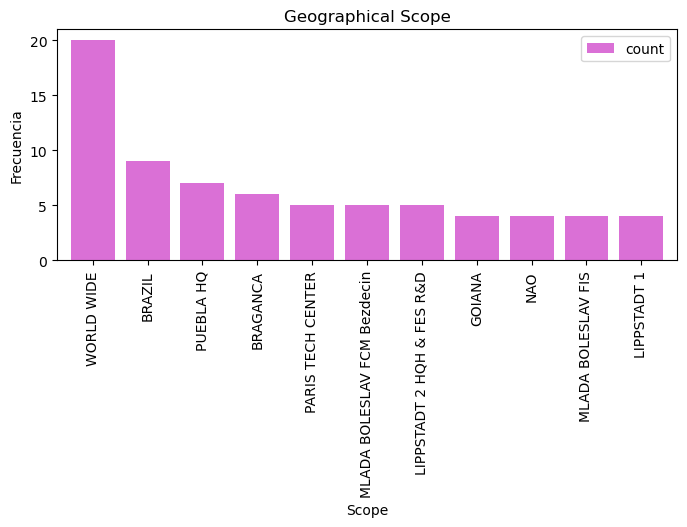

In [26]:
# realizamos gráfico de barras
filtro_index1.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Geographical Scope')
plt.xlabel('Scope')
plt.ylabel('Frecuencia')

In [27]:
idx = df[df["Geographical scope"] == "WORLD WIDE"].index
df = df.drop(idx)

In [28]:
tabla_freq1 = df['Geographical scope'].value_counts().reset_index()
tabla_freq1

,Geographical scope,count
0,BRAZIL,9
1,PUEBLA HQ,7
2,BRAGANCA,6
3,LIPPSTADT 2 HQH & FES R&D,5
4,MLADA BOLESLAV FCM Bezdecin,5
...,...,...
120,JANGAN FHS,1
121,JANGAN,1
122,HERRENBERG,1
123,GIARMATA HQ,1


In [29]:
# filtro con los valores más relevantes de la variable 
filtro1 = tabla_freq1[tabla_freq1['count']>3]
filtro1

,Geographical scope,count
0,BRAZIL,9
1,PUEBLA HQ,7
2,BRAGANCA,6
3,LIPPSTADT 2 HQH & FES R&D,5
4,MLADA BOLESLAV FCM Bezdecin,5
5,PARIS TECH CENTER,5
6,LIPPSTADT 1,4
7,MLADA BOLESLAV FIS,4
8,NAO,4
9,GOIANA,4


In [30]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index1 = filtro1.set_index('Geographical scope')
filtro_index1

,count
Geographical scope,
BRAZIL,9
PUEBLA HQ,7
BRAGANCA,6
LIPPSTADT 2 HQH & FES R&D,5
MLADA BOLESLAV FCM Bezdecin,5
PARIS TECH CENTER,5
LIPPSTADT 1,4
MLADA BOLESLAV FIS,4
NAO,4


Text(0, 0.5, 'Frecuencia')

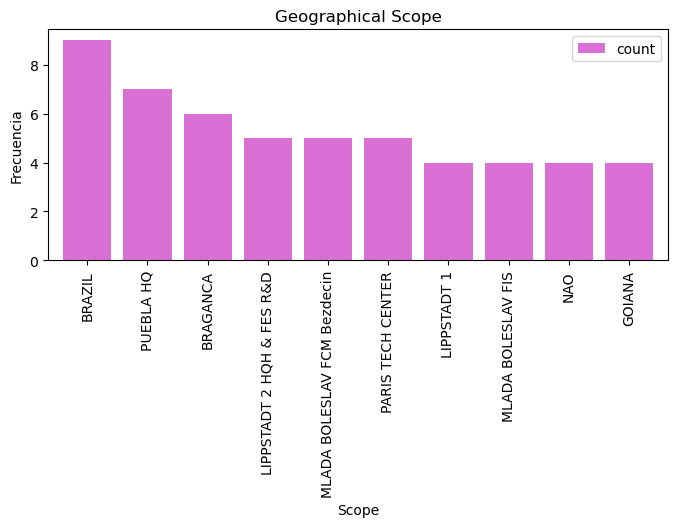

In [31]:
filtro_index1.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Geographical Scope')
plt.xlabel('Scope')
plt.ylabel('Frecuencia')

#### **Project manager**

In [32]:
tabla_freq2 = df['Project manager'].value_counts().reset_index()
tabla_freq2

,Project manager,count
0,SOUZA Alexandre,15
1,BENAVENT Pablo,12
2,LOUBET Diana,9
3,SVARICEK Dan,9
4,MALTER Karsten,7
...,...,...
105,AYEVA Djanwari Talata,1
106,WISCHMANN Imke,1
107,GOMEZ Tomas,1
108,GOIAN Floriana Simona,1


In [33]:
# filtro con los valores más relevantes de la variable 
filtro2 = tabla_freq2[tabla_freq2['count']>3]
filtro2

,Project manager,count
0,SOUZA Alexandre,15
1,BENAVENT Pablo,12
2,LOUBET Diana,9
3,SVARICEK Dan,9
4,MALTER Karsten,7
5,LOURENCO Douglas,6
6,CAEIRO Helder,6
7,FENETRE Teddy,5
8,NITSCKIE Jade,5
9,ATTOF Mohamed,4


In [34]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index2 = filtro2.set_index('Project manager')
filtro_index2

,count
Project manager,
SOUZA Alexandre,15
BENAVENT Pablo,12
LOUBET Diana,9
SVARICEK Dan,9
MALTER Karsten,7
LOURENCO Douglas,6
CAEIRO Helder,6
FENETRE Teddy,5
NITSCKIE Jade,5


Text(0, 0.5, 'Frecuencia')

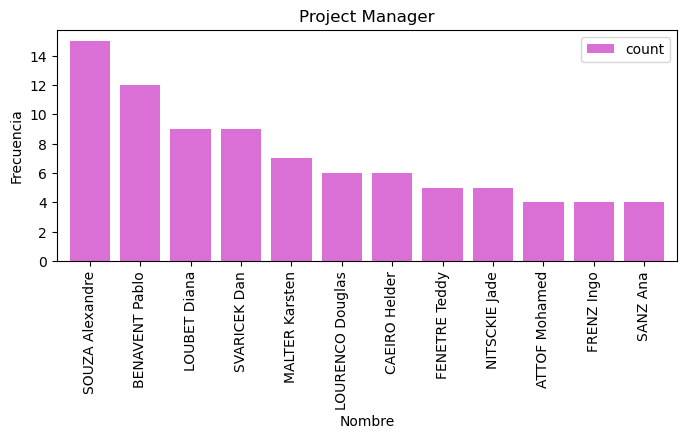

In [35]:
# realizamos gráfico de barras
filtro_index2.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project Manager')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

#### **State**

In [36]:
tabla_freq3 = df['State'].value_counts().reset_index()
tabla_freq3

,State,count
0,Work in progress,213
1,Pending,11
2,Open,1


In [37]:
# filtro con los valores más relevantes de la variable 
filtro3 = tabla_freq3[tabla_freq3['count']>0]
filtro3

,State,count
0,Work in progress,213
1,Pending,11
2,Open,1


In [38]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index3 = filtro3.set_index('State')
filtro_index3

,count
State,
Work in progress,213
Pending,11
Open,1


Text(0, 0.5, 'Frecuencia')

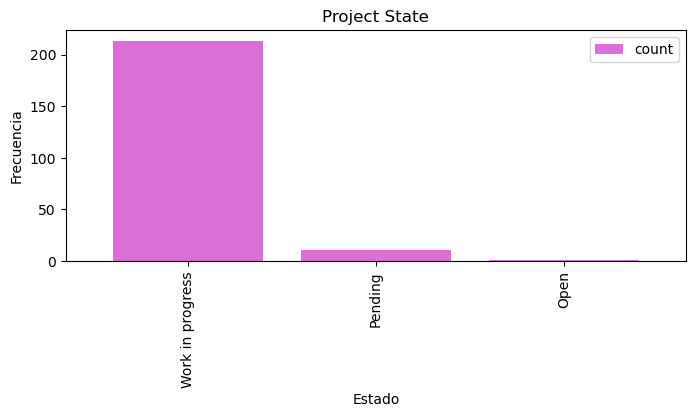

In [39]:
# realizamos gráfico de barras
filtro_index3.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project State')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')

<Axes: ylabel='count'>

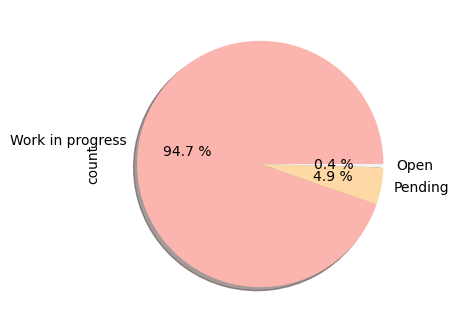

In [40]:
filtro_index3["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **Projects Size**

In [41]:
tabla_freq4 = df['Project size'].value_counts().reset_index()
tabla_freq4

,Project size,count
0,MEDIUM,96
1,LARGE,71
2,SMALL,58


In [42]:
# filtro con los valores más relevantes de la variable 
filtro4 = tabla_freq4[tabla_freq4['count']>1]
filtro4

,Project size,count
0,MEDIUM,96
1,LARGE,71
2,SMALL,58


In [43]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index4 = filtro4.set_index('Project size')
filtro_index4

,count
Project size,
MEDIUM,96
LARGE,71
SMALL,58


Text(0, 0.5, 'Frecuencia')

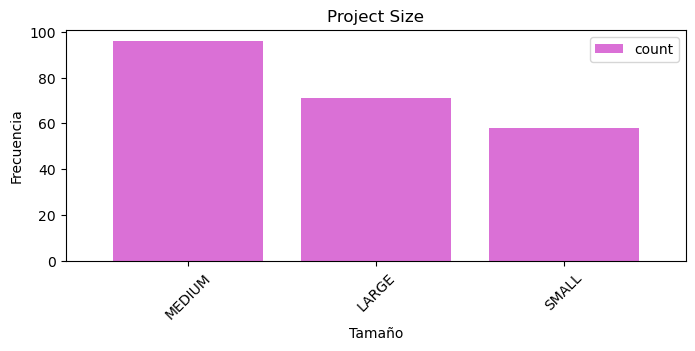

In [44]:
# realizamos gráfico de barras
filtro_index4.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid", rot=45)
plt. title('Project Size')
plt.xlabel('Tamaño')
plt.ylabel('Frecuencia')

<Axes: ylabel='count'>

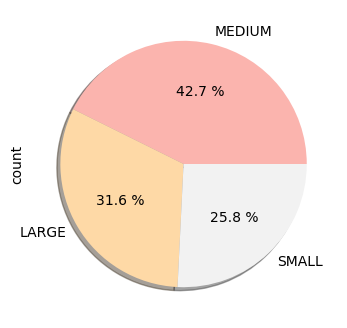

In [45]:
filtro_index4["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **Project Organization**

In [46]:
tabla_freq5 = df['Project organization'].value_counts().reset_index()
tabla_freq5

,Project organization,count
0,GIT/IT EMEA/MES & Digital Shopfloor projects,61
1,GIT/IT EMEA/Applications rollouts & Level 2 Su...,42
2,GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & ...,15
3,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,14
4,GIT/IT NAO/MES Applications & DT/Mexico MES,13
5,GIT/IT NAO/NAO Applications/FCS,9
6,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Infr...,8
7,GIT/IT NAO,8
8,GIT/Applications,8
9,GIT/IT NAO/MES Applications & DT/US MES,6


In [47]:
# filtro con los valores más relevantes de la variable 
filtro5 = tabla_freq5[tabla_freq5['count']>4]
filtro5

,Project organization,count
0,GIT/IT EMEA/MES & Digital Shopfloor projects,61
1,GIT/IT EMEA/Applications rollouts & Level 2 Su...,42
2,GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & ...,15
3,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,14
4,GIT/IT NAO/MES Applications & DT/Mexico MES,13
5,GIT/IT NAO/NAO Applications/FCS,9
6,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Infr...,8
7,GIT/IT NAO,8
8,GIT/Applications,8
9,GIT/IT NAO/MES Applications & DT/US MES,6


In [48]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index5 = filtro5.set_index('Project organization')
filtro_index5

,count
Project organization,
GIT/IT EMEA/MES & Digital Shopfloor projects,61
GIT/IT EMEA/Applications rollouts & Level 2 Support,42
GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & BPA.,15
GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES & Digital Transformation,14
GIT/IT NAO/MES Applications & DT/Mexico MES,13
GIT/IT NAO/NAO Applications/FCS,9
GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Infrastructure,8
GIT/IT NAO,8
GIT/Applications,8


Text(0, 0.5, 'Frecuencia')

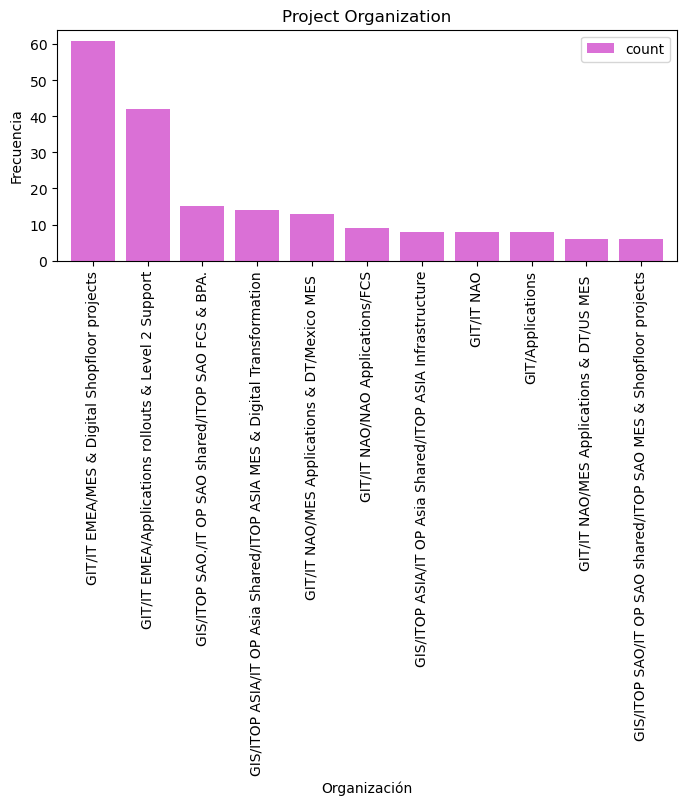

In [49]:
# realizamos gráfico de barras
filtro_index5.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('Project Organization')
plt.xlabel('Organización')
plt.ylabel('Frecuencia')

#### **BG**

In [50]:
tabla_freq6 = df['BG'].value_counts().reset_index()
tabla_freq6

,BG,count
0,FIS,66
1,FCM,57
2,FAS,43
3,GROUP,29
4,FCE,8
5,FES,6
6,FLG,6
7,FLV,5
8,HQH,4
9,SAS,1


In [51]:
# filtro con los valores más relevantes de la variable 
filtro6 = tabla_freq6[tabla_freq6['count']>5]
filtro6

,BG,count
0,FIS,66
1,FCM,57
2,FAS,43
3,GROUP,29
4,FCE,8
5,FES,6
6,FLG,6


In [52]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index6 = filtro6.set_index('BG')
filtro_index6

,count
BG,
FIS,66
FCM,57
FAS,43
GROUP,29
FCE,8
FES,6
FLG,6


Text(0, 0.5, 'Frecuencia')

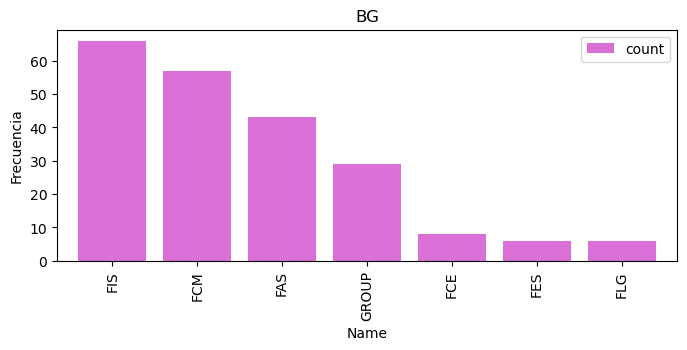

In [53]:
# realizamos gráfico de barras
filtro_index6.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "orchid")
plt. title('BG')
plt.xlabel('Name')
plt.ylabel('Frecuencia')

#### **Project Health**

In [54]:
tabla_freq7 = df['Project Health'].value_counts().reset_index()
tabla_freq7

,Project Health,count
0,Green,166
1,Yellow,46
2,Red,13


In [55]:
# filtro con los valores más relevantes de la variable 
filtro7 = tabla_freq7[tabla_freq7['count']>1]
filtro7

,Project Health,count
0,Green,166
1,Yellow,46
2,Red,13


In [56]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index7 = filtro7.set_index('Project Health')
filtro_index7

,count
Project Health,
Green,166
Yellow,46
Red,13


<Axes: ylabel='count'>

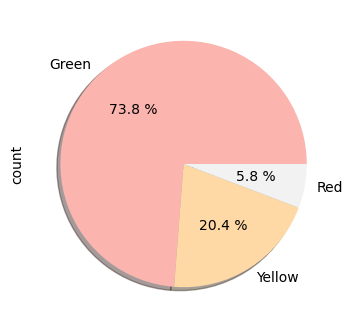

In [57]:
filtro_index7["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **On-Hold**

In [58]:
tabla_freq8 = df['On-hold'].value_counts().reset_index()
tabla_freq8

,On-hold,count
0,FALSO,176
1,VERDADERO,49


In [59]:
# filtro con los valores más relevantes de la variable 
filtro8 = tabla_freq8[tabla_freq8['count']>1]
filtro8

,On-hold,count
0,FALSO,176
1,VERDADERO,49


In [60]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index8 = filtro8.set_index('On-hold')
filtro_index8

,count
On-hold,
FALSO,176
VERDADERO,49


<Axes: ylabel='count'>

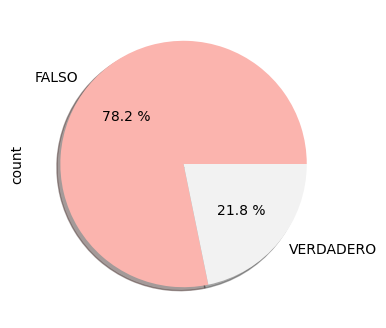

In [61]:
# realizamos gráfico de barras
filtro_index8["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

#### **Categorizar la variable "Percent complete" aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas**

In [62]:
df['Percent complete'].info() # Número total de la población "n"
n = 225

<class 'pandas.core.series.Series'>
Index: 225 entries, 0 to 244
Series name: Percent complete
Non-Null Count  Dtype  
--------------  -----  
225 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [63]:
max = df['Percent complete'].max()
min = df['Percent complete'].min()
limites = [min, max]
limites

[0.0, 99.92]

In [64]:
R = max - min
R

99.92

In [65]:
ni = 1 + 3.32 * np.log10(n)
ni  

np.float64(8.809245960129724)

Tomaremos el número redondeado como el correcto ni = 9

In [66]:
i = R / ni
i

np.float64(11.342628012912083)

In [67]:
intervalos = np.linspace(-0.1, 99.82, 10)
intervalos

array([-0.1       , 11.00222222, 22.10444444, 33.20666667, 44.30888889,
       55.41111111, 66.51333333, 77.61555556, 88.71777778, 99.82      ])

In [68]:
categorias = [
    "Categoría 1 (0.0 - 11.1)",      
    "Categoría 2 (11.1 - 22.2)",     
    "Categoría 3 (22.2 - 33.3)",    
    "Categoría 4 (33.3 - 44.4)",    
    "Categoría 5 (44.4 - 55.6)",   
    "Categoría 6 (55.6 - 66.7)", 
    "Categoría 7 (66.7 - 77.8)",  
    "Categoría 8 (77.8 - 88.9)", 
    "Categoría 9 (88.9 - 99.8)"   
]

In [69]:
df['Percent complete'] = pd.cut(x = df['Percent complete'], bins = intervalos, labels = categorias)
df['Percent complete']

0      Categoría 3 (22.2 - 33.3)
1      Categoría 5 (44.4 - 55.6)
2      Categoría 9 (88.9 - 99.8)
3      Categoría 2 (11.1 - 22.2)
4      Categoría 3 (22.2 - 33.3)
                 ...            
240     Categoría 1 (0.0 - 11.1)
241    Categoría 9 (88.9 - 99.8)
242     Categoría 1 (0.0 - 11.1)
243    Categoría 8 (77.8 - 88.9)
244     Categoría 1 (0.0 - 11.1)
Name: Percent complete, Length: 225, dtype: category
Categories (9, object): ['Categoría 1 (0.0 - 11.1)' < 'Categoría 2 (11.1 - 22.2)' < 'Categoría 3 (22.2 - 33.3)' < 'Categoría 4 (33.3 - 44.4)' ... 'Categoría 6 (55.6 - 66.7)' < 'Categoría 7 (66.7 - 77.8)' < 'Categoría 8 (77.8 - 88.9)' < 'Categoría 9 (88.9 - 99.8)']

In [70]:
tabla_freq9 = df['Percent complete'].value_counts().reset_index()
tabla_freq9

,Percent complete,count
0,Categoría 1 (0.0 - 11.1),69
1,Categoría 9 (88.9 - 99.8),41
2,Categoría 2 (11.1 - 22.2),30
3,Categoría 3 (22.2 - 33.3),22
4,Categoría 5 (44.4 - 55.6),16
5,Categoría 4 (33.3 - 44.4),15
6,Categoría 6 (55.6 - 66.7),12
7,Categoría 8 (77.8 - 88.9),12
8,Categoría 7 (66.7 - 77.8),6


In [71]:
filtro9 = tabla_freq9[tabla_freq9['count']>0]
filtro9

,Percent complete,count
0,Categoría 1 (0.0 - 11.1),69
1,Categoría 9 (88.9 - 99.8),41
2,Categoría 2 (11.1 - 22.2),30
3,Categoría 3 (22.2 - 33.3),22
4,Categoría 5 (44.4 - 55.6),16
5,Categoría 4 (33.3 - 44.4),15
6,Categoría 6 (55.6 - 66.7),12
7,Categoría 8 (77.8 - 88.9),12
8,Categoría 7 (66.7 - 77.8),6


In [72]:
filtro_index9 = filtro9.set_index('Percent complete')
filtro_index9

,count
Percent complete,
Categoría 1 (0.0 - 11.1),69
Categoría 9 (88.9 - 99.8),41
Categoría 2 (11.1 - 22.2),30
Categoría 3 (22.2 - 33.3),22
Categoría 5 (44.4 - 55.6),16
Categoría 4 (33.3 - 44.4),15
Categoría 6 (55.6 - 66.7),12
Categoría 8 (77.8 - 88.9),12
Categoría 7 (66.7 - 77.8),6


Text(0, 0.5, 'Frecuencia')

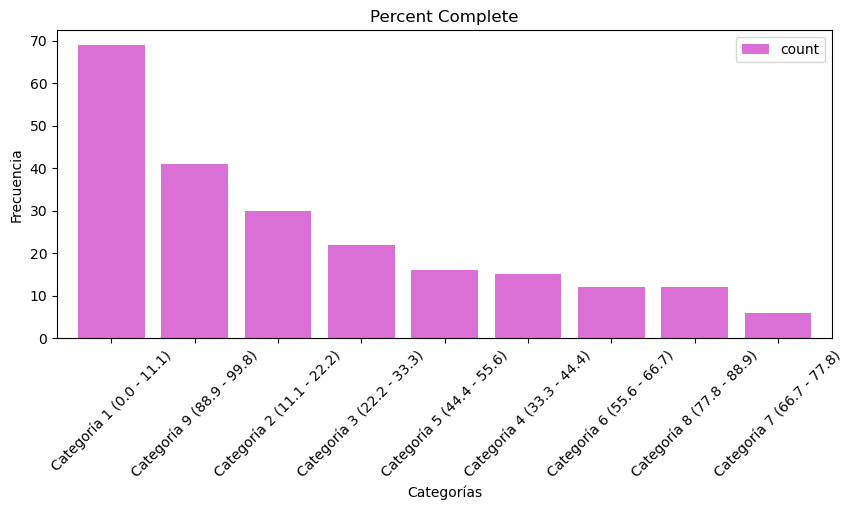

In [73]:
filtro_index9.plot(kind = 'bar', width = 0.8, figsize = (10,4), color = "orchid", rot = 45)
plt. title('Percent Complete')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

La gráfica muestra una distribución descendente en la gestión de portfolios de proyectos.

Vemos que hay muchos proyectos apenas empezando (78 en la primera categoría) y muy pocos que ya están casi listos o terminados (solo 12 en la última).

Esto es normal es común que algunos proyectos se abandonen en el camino, otros tomen más tiempo del esperado, y solo unos cuantos logren terminarse correctamente.